<a href="https://colab.research.google.com/github/MC-Codingcat/Finance-Project-Bank-Stocks/blob/main/Finance_Data_Project_Bank_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finance Data Project-Bank Stocks**

This is a capstone data project for the Udemy course I attended - [*Python for Data Science and Machine Learning Bootcamp*](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/?utm_source=adwords&utm_medium=udemyads&utm_campaign=Python_v.PROF_la.EN_cc.ROWMTA-B_ti.7380&utm_content=deal4584&utm_term=_._ag_80869582031_._ad_533999956687_._kw__._de_c_._dm__._pl__._ti_dsa-774930046209_._li_1010700_._pd__._&matchtype=&gad_source=1&gclid=CjwKCAiAu9yqBhBmEiwAHTx5pxSwxNBq2_WY4jntQHplF_e6zMCn_fcyw0tFa6fCV5X_yMd_ZLpSqRoCw7oQAvD_BwE).

This project focuses on exploratory data analysis of stock prices with pandas and visualization libraries. It is not meant to be a robust financial analysis or be taken as financial advice.
____
The focus is on bank stocks and how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016. The data is obtained from open data sources (Yahoo Finance data via yfinance).

## **Get the Data**

For the project the data was supposed to be obtained from Google finance using  pandas datareader.
<br><br/>
Unfortunately, when I was able to embark on this exercise, the Google Finance endpoints which were used in Pandas Datareader have been discontinued. What's worse, the alternative options--IEX and Yahoo Finance don't work either. Usage of all IEX readers now requires an API key [(see here)](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#iex), and Yahoo made changes to their API that broke compatibility with pandas datareader versions [(see this stack overflow page)](https://stackoverflow.com/questions/74832296/typeerror-string-indices-must-be-integers-when-getting-data-of-a-stock-from-y).
<br><br/>
In the end I got the needed data via yfinance (thank you yfinance!!), but on the page above there are also more advanced solutions to the problem.
<br><br/>
Nevertheless, pandas datareader is a fabulous tool to grab data with just one line. Data from World Bank, OECD, and Eurostat can still be retrieved using the tool.
<br><br/>





### **The Imports**

In [36]:
import yfinance
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings('ignore')

## **Data**

The data contains stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo
<br><br/>

Data from Jan 1st 2006 to Jan 1st 2016 for each of these banks is obtained. Each bank will be a separate dataframe, with the variable name for that bank being its ticker symbol. This involves the following steps:
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Grab info on the stock.

**A sample of getting data via yfinance:**
    
    import yfinance as yf
    df = yf.download(your_ticks_or_a_tick_list, start=start_date, end=end_date)


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [12]:
# Bank of America
BAC = yfinance.download('BAC', start, end)

# CitiGroup
C = yfinance.download('C', start, end)

# Goldman Sachs
GS = yfinance.download('GS', start, end)

# JPMorgan Chase
JPM = yfinance.download('JPM', start, end)

# Morgan Stanley
MS = yfinance.download('MS', start, end)

# Wells Fargo
WFC = yfinance.download('WFC', start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Create a list of the ticker symbols (as strings) in alphabetical order.

In [13]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.


Set the keys argument equal to the tickers list.

In [14]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [18]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.425446  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.081085  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.122391  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.074203  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.094864  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.585449  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.608498  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.700634  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.735207  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.092319  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369600  11016400  
2006-01-04   31.530001  19.144930  10870000  
2006-01-05   31.495001  19.123686  10158000  
2006-01-06   31.680000  19.236010   8403800  
2006-01-09   31.674999  19.232971   5619600  

[5 rows x 36 columns]

# **EDA**

Exploring the data using [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [.xs()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html). As we now have a multi-level / hierarchical data, this will be a major part of the project.

<br><br/>
**Q1: What is the max Close price for each bank's stock throughout the time period?**

In [19]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:


$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [25]:
returns = pd.DataFrame()

The pandas **pct_change()** method can be used to create a column representing this return value.

Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [26]:
for tick in tickers:
    returns [tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Create a pairplot using seaborn of the returns dataframe.

<Figure size 800x600 with 0 Axes>

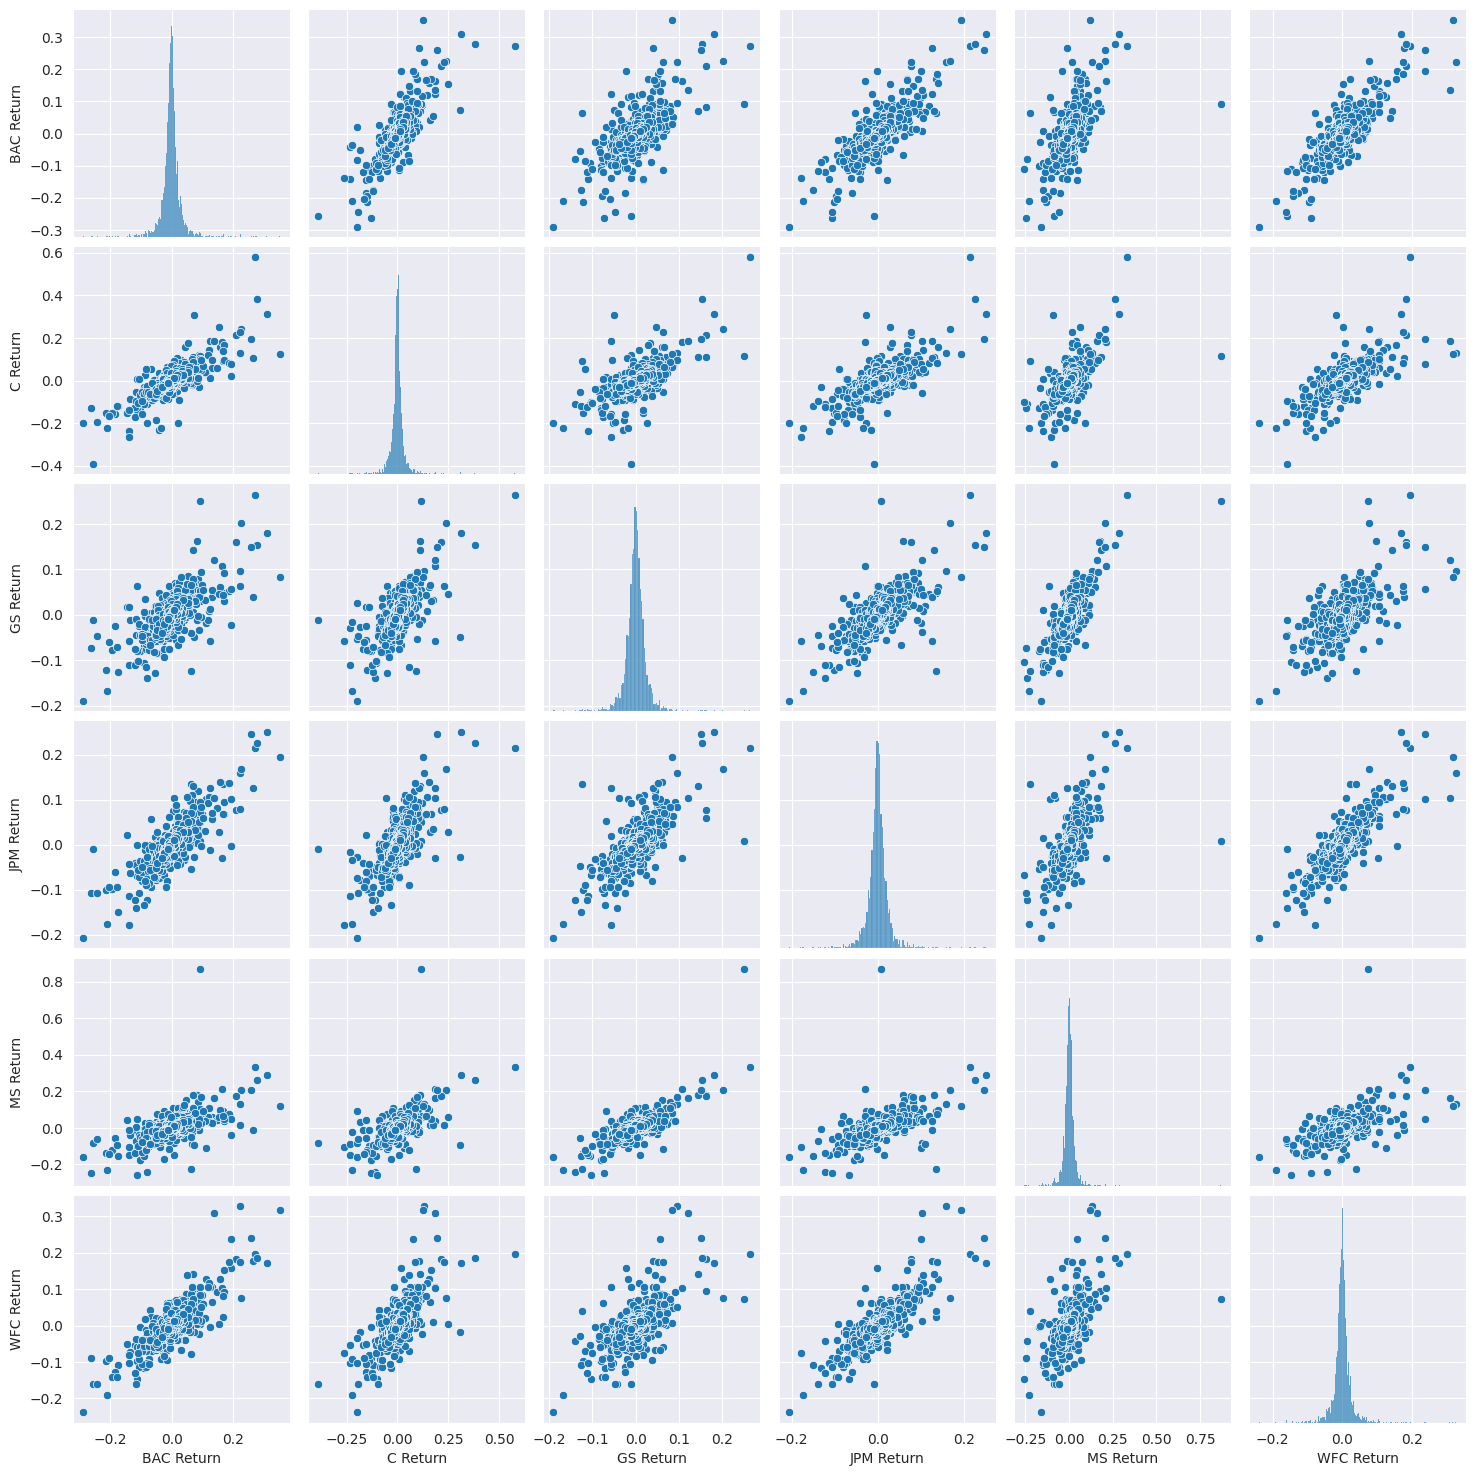

In [35]:
#returns[1:]
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.pairplot(returns[1:])

**Q2： How do you interpret the performance of the banks based on the plots?**
<br><br/>
Returns for each bank most often fluctuated around 0, but Citigroup had the lowest floor and the highest variance, with returns fluctuating close to 1. Goldman Sachs, JP Morgan and Morgan Stanley were the best performers in terms of keeping a stable (and positive) return rate, especially MS.

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29)
<br><br/>

**Q3： On what dates did each bank stock have the best and worst single day returns.?**
<br><br/>
Four of the banks share the same day for the worst drop on Inauguration Day.

In [28]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [29]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Citigroup's largest drop and biggest gain were very close to one another, that is because [Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

**Q4： Which bank was the riskiest to invest with?**
<br><br/>
The standard deviations of the returns for the banks show the risks of investing with them over the entire time period. As discussed above, Citigroup is apparently the worst.

In [39]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

**Q5: Which would you classify as the riskiest for the year 2015?**
<br><br/>
Very similar risk profiles, but Citigroup was doing fine in 2015. Morgan Stanley and BofA had the highest risks.

In [43]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Create a distplot using seaborn of the 2015 returns for Morgan Stanley.

<Axes: xlabel='MS Return', ylabel='Density'>

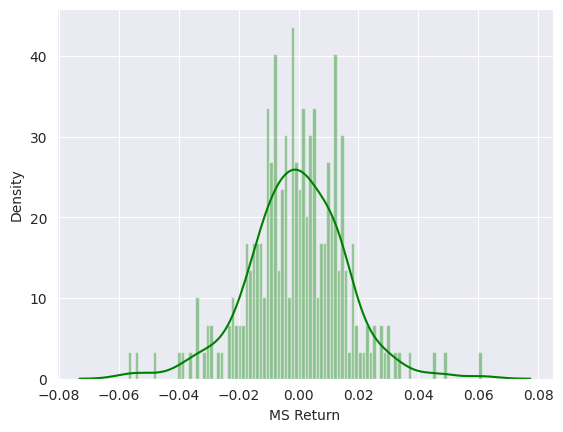

In [44]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

Create a distplot using seaborn of the 2008 returns for CitiGroup.

<Axes: xlabel='C Return', ylabel='Density'>

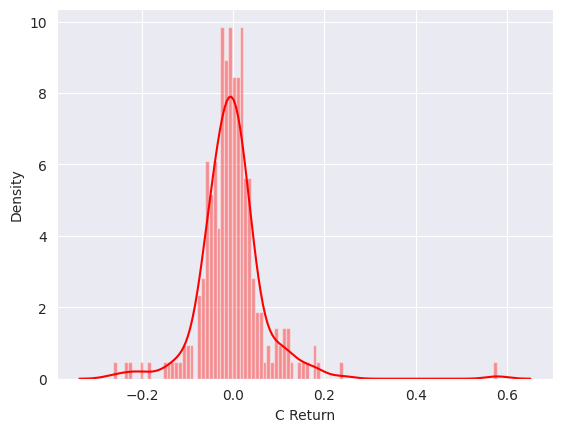

In [45]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Optional Plotly Method Imports
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

**Q6: How were the stocks of the banks performing over the entire time period?**
<br><br/>

Create a line plot showing Close price for each bank for the entire index of time.

Use a for loop /[.xs()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.

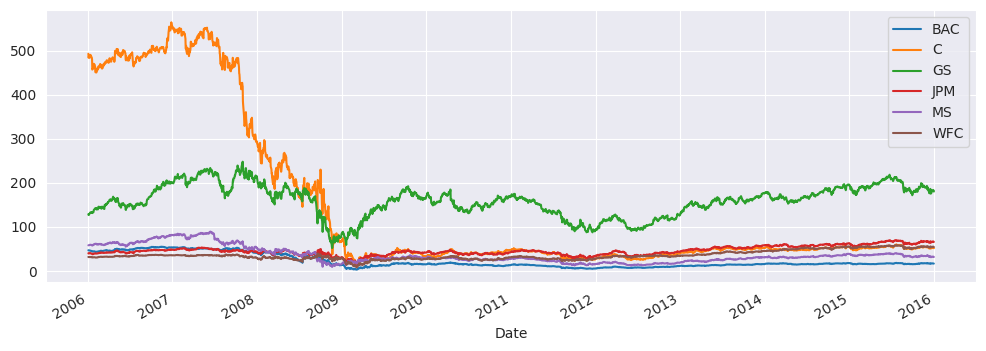

In [47]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

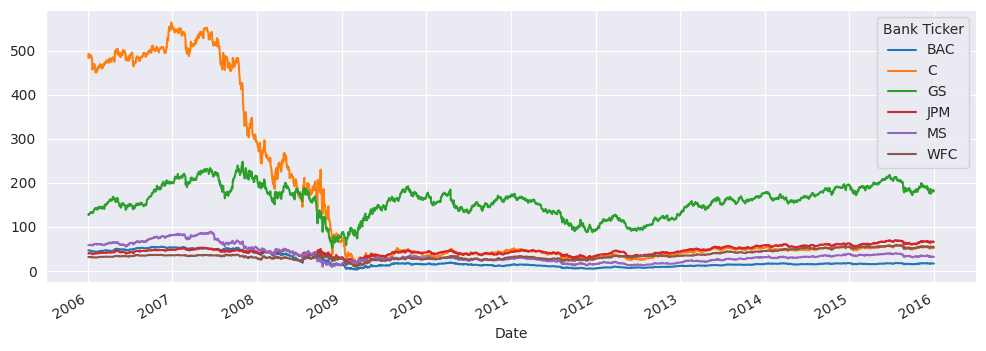

In [49]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

Use Plotly to create an interactive plot that shows more specific data (name of the bank, date, related close price) when the viewer hovers the mouse cursor over.

In [50]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.
<br><br/>
Let's analyze the moving averages for these stocks in the year 2008.
<br><br/>


**Req 1: Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.**

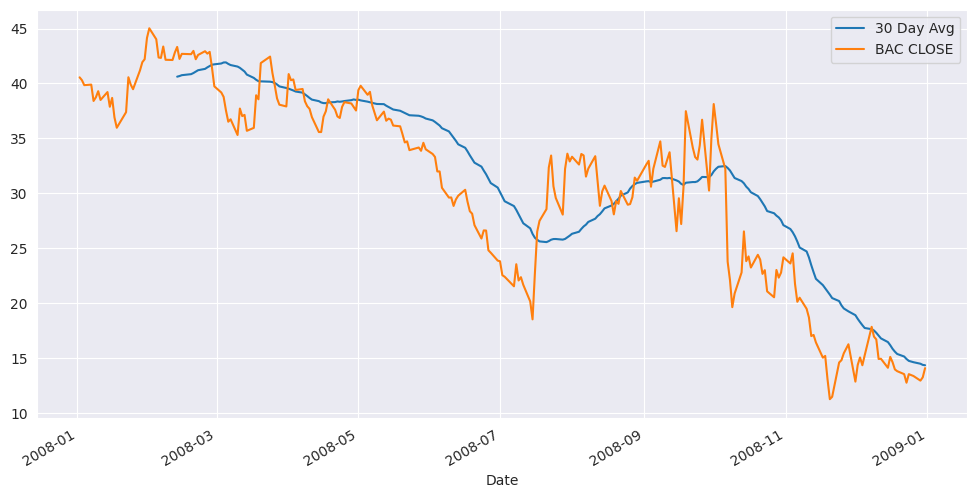

In [51]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Req 2: Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

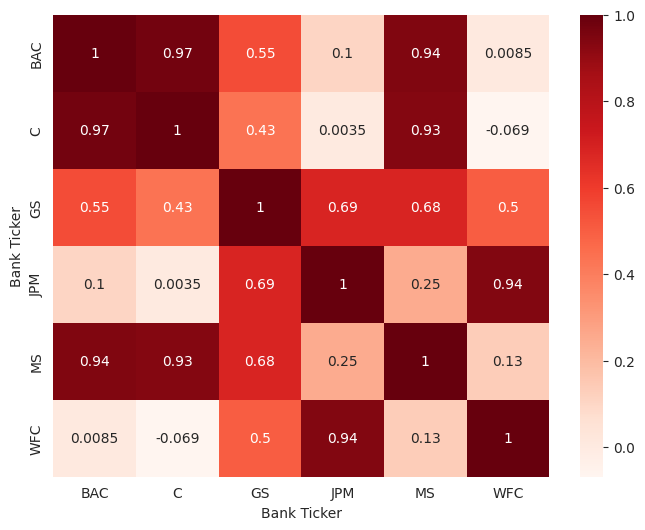

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='Reds')

**Req 3: Use seaborn's clustermap to cluster the correlations together.**

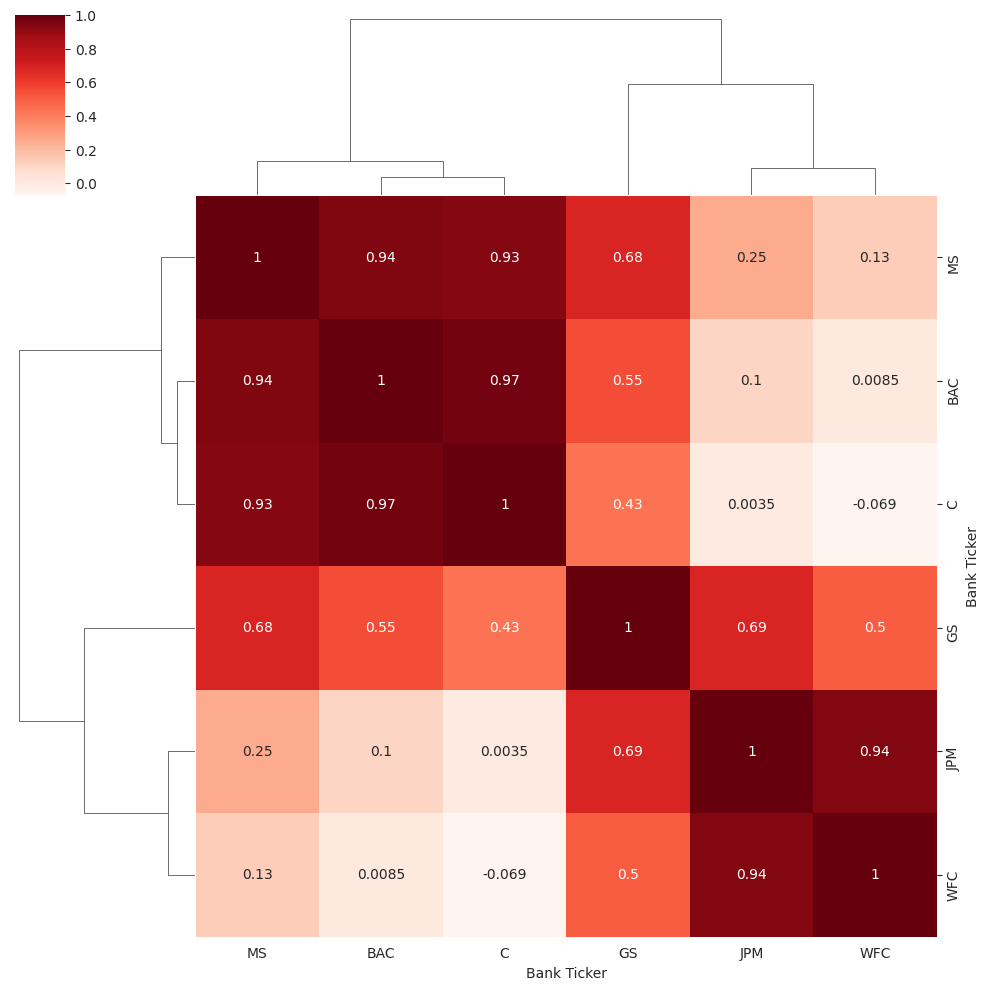

In [78]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='Reds')

In [98]:
layout1 = cf.Layout(height=800,width=800)
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='reds',layout=layout1)

# Part 2 (Optional) - Technical Analysis

In this second part of the project we rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project and will be very sensitive to any broken functionality in the future.

**Req 1: Use .iplot(kind='candle') to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

A candle plot (candlestick chart) is especially useful for stock analysis as it is capable of illustrating the price movement by showing four price points (open, close, high, and low) on one data point.

In [100]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Req 2: Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

Simple moving averages calculate the average of a range of prices by the number of periods within that range. A simple moving average is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend. Different from an exponential moving average, this method gives equal weight to each of the values within a time period.
<br><br/>
Most common periods used are 100 days, 200 days, and 500 days for long-term support, and 5 days, 10 days, 20 days, and 50 days for near-term trends.

In [107]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[10,20,50],title='Simple Moving Averages')

**Req 3: Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**
<br><br/>
One major use case for Bollinger band plots is to help understand undersold vs. oversold stocks. As a stock’s market price moves closer to the upper band, the stock is perceived to be overbought, and as the price moves closer to the lower band, the stock is more oversold [(Origin)](https://python.plainenglish.io/xx-minute-beginners-financial-analysis-in-python-366553b587ae).

In [102]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

<br><br/>
____
##-END-
